±
## 추정 문제 풀이
함수에 파라미터가 뭔지 모르면 그냥 help(함수) 쓰기.

### 그룹이 1개일때 
- 평균 (평균만 소표본 구할때 norm대신 t분포 사용)
  * 대표본 : x_bar ± norm.ppf(1-alpha/2)* (s / np.sqrt(n))
  * 소표본 : x_bar ± t.ppf(q=1-alpha/2,df=n-1)* (s / np.sqrt(n))
- 비율 
  * phat ± norm.ppf(1-alpha/2)* np.sqrt(phat*(1-phat)/n)
- 분산 
  * (n-1)*s2/chi2.ppf(q=1-alpha/2,df=n-1) and q=alpha/2

### 그룹이 2개일때
- 평균
    * 대표본 : a_mean - b_mean ± norm.ppf(alpha/2)*np.sqrt(var1/n + var2/n)
    * 소표본 : pooled_s2 = (n1-1)*var1 + (n2-1)*var2/n1+n2-2,
    * a_mean - b_mean ± t.ppf(q=alpha/2,df=n-1)*pooled_s2*np.sqrt(1/n1 + 1/n2) 
- 비율
    * phat1 - phat2 ± norm.ppf(alpha/2) * np.sqrt(phat1*(1-phat1)/n1 + phat2*(1-phat2)/n2)
- 분산 (그룹 1개면 chi2 사용, 2개면 F분포 사용)
  * var1/var2 * F(q=1-alpha/2,dfn=n1-1,dfd=n2-1)


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm, t


# 확률과 모집단에 대한 90% 신뢰구간 구하기  

# 표본공간의 크기, 데이터 개수 
n = 250  
x = 70 

# 확률
p_hat = x/n

# 신뢰구간

z_norm = norm(loc=0, scale=1)
L1 = p_hat - z_norm.ppf(0.95) * np.sqrt(p_hat*(1-p_hat)/n)
U1 = p_hat + z_norm.ppf(0.95) * np.sqrt(p_hat*(1-p_hat)/n)

print(f"표본확률 : {p_hat}")
print(f"확률에 대한 90% 신뢰구간 {np.round(L1,4)} ~ {np.round(U1,4)} ")

표본확률 : 0.28
확률에 대한 90% 신뢰구간 0.2333 ~ 0.3267 


HW2

- 동전의 앞면과 뒷면이 나올 확률은 각각 0.5이다.
- 이 동전을 1000 번 던져서, 앞면이 나올 확률을 선 그래프로 완성하시오.
- 선 그래프는 x 축은 0부터 1000까지, y축은 0부터 1까지로 나타나야 합니다.
- y가 0.5인 x축에 평행한 선을 빨간색으로 함께 나타내야 합니다.

In [92]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
# 1 : Head, 0 : Tail
result = np.random.choice([1,0], replace=True,size=n)
result[:50]

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0])

In [94]:
# 상대도수가 1/2로 수렴하는지 확인.
# 확률: 성공 개수 / 시행횟수
trial = np.arange(1,n+1)
freq = np.cumsum(result)
prob = freq/trial
prob[950:999]

array([0.50683491, 0.50630252, 0.50682057, 0.50628931, 0.50575916,
       0.50523013, 0.50574713, 0.50626305, 0.50677789, 0.50625   ,
       0.50676379, 0.50623701, 0.50571132, 0.50518672, 0.50466321,
       0.50517598, 0.50568769, 0.50619835, 0.50567595, 0.50618557,
       0.50566426, 0.50514403, 0.50565262, 0.50513347, 0.50461538,
       0.50409836, 0.5035824 , 0.50306748, 0.50357508, 0.50408163,
       0.50458716, 0.50509165, 0.50457782, 0.50406504, 0.50456853,
       0.50507099, 0.50557244, 0.50506073, 0.50455005, 0.50505051,
       0.50554995, 0.50604839, 0.50553877, 0.50603622, 0.50653266,
       0.5060241 , 0.50651956, 0.50601202, 0.50650651])

<Figure size 640x480 with 0 Axes>

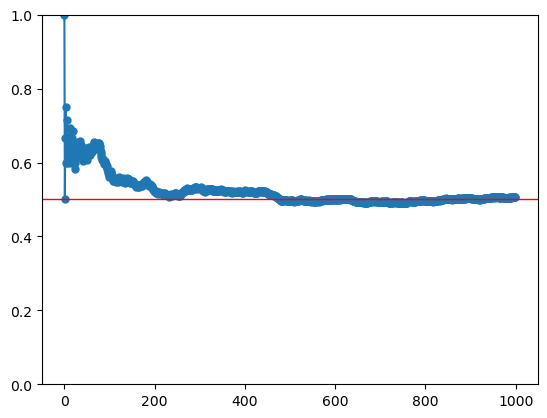

In [96]:
plt.figure()
fig,ax1= plt.subplots()
ax1.plot(prob,marker='o',markersize=5)
plt.ylim(0,1)
plt.axhline(y=0.5, color="red",linewidth=1)
plt.show()

HW3

- can_data 를 이용하여 아래 사항을 구하시오.
- (1) 분산의 점추정량을 구하시오.
- (2) 분산에 대한 95% 신뢰구간을 구하시오.

In [98]:
import numpy as np
from scipy.stats import norm,chi2

can_data = np.array([
    101.8, 101.5, 102.6, 101, 101.8, 96.8, 102.4, 100,
    98.8, 98.1, 98.8, 98, 99.4, 95.5, 100.1, 100.5, 97.4, 100.2,
    101.4, 98.7, 101.4, 99.4, 101.7, 99, 99.7, 98.8, 99.5, 100,
    99.7, 100.9, 99.7, 99, 98.8, 99.7, 100.9, 99.9, 97.5,
    101.5, 98.2, 99.2, 98.6, 101.4, 102.1, 102.9, 100.8,
    99.4, 103.7, 100.3, 100.2, 101.1, 101.8, 100, 101.2,
    100.5, 101.2, 101.6, 99.9, 100.5, 100.4, 98.1, 100.1,
    101.6, 99.3, 96.1, 100, 99.7, 99.7, 99.4, 101.5, 100.9,
    101.2, 99.9, 99.1, 100.7, 100.8, 100.8, 101.4, 100.3, 98.4, 97.2
])

In [100]:
## 모평균 신뢰구간 95% 구하기 
n = len(can_data)
can_mean = np.mean(can_data)
alpha = 0.05
s2 = np.var(can_data,ddof=1)

l1 = can_mean - norm.ppf(alpha/2)*np.sqrt(s2/n)
u1 = can_mean + norm.ppf(alpha/2)*np.sqrt(s2/n)

print(f"평균 점 추정량 : {can_mean}")
print(f"모평균 95% 신뢰구간 : {np.round(l1,4)} ~ {np.round(u1,4)}")

평균 점 추정량 : 100.03875000000001
모평균 95% 신뢰구간 : 100.3722 ~ 99.7053


In [102]:
# 모비율 신뢰구간 95% 구하기
# 동전 500번 던진 데이터로 진행하자
n = 500
result = np.random.choice([1,0],replace=True,size=n)
phat= np.sum(result)/len(result)

l1 = phat - norm.ppf(1-alpha/2)*np.sqrt(phat*(1-phat)/n)
u1 = phat + norm.ppf(1-alpha/2)*np.sqrt(phat*(1-phat)/n)

print(f"표본비율 점 추정량 : {phat}")
print(f"모비율 95% 신뢰구간 {np.round(l1,4)} ~ {np.round(u1,4)}")

표본비율 점 추정량 : 0.474
모비율 95% 신뢰구간 0.4302 ~ 0.5178


In [145]:
# 점추정량, 모분산 95%신뢰구간
n = len(can_data)
df=n-1
alpha=0.05
s2 = np.var(can_data,ddof=1)

l1 = (n-1)*s2/chi2.ppf(df=df,q=1-alpha/2)
u1 = (n-1)*s2/chi2.ppf(df=df,q=alpha/2)
print(f"점 추정량 : {s2}")
print(f"모분산 신뢰구간 : {np.round(l1,4)} ~ {np.round(u1,4)}")

점 추정량 : 2.3160743670886093
모분산 신뢰구간 : 1.7348 ~ 3.2494


In [147]:
## 소표본에서 평균 차이의 신뢰구간 구하기 
a_group = np.random.choice(can_data,replace=True,size=30)
b_group = np.random.choice(can_data,replace=True,size=30)

print("---a group---")
print(a_group)
print("---b group---")
print(b_group)

---a group---
[ 98.1  98.8  99.7 102.6  99.4  98.2 101.2 100.9  99.7  98.1  98.7  98.1
  98.8 100.  101.5 100.   99.7 101.7  98.8 101.8  99.7  99.9  99.4 101.4
 101.5  99.9 100.8  99.  100.  101.5]
---b group---
[ 98.8 101.4  99.4  98.1  99.4  98.8 100.1 100.9 100.  100.9 102.1 102.6
 100.8  98.4  97.4  99.2 100.3  98.4  98.  100.3 101.4 101.5 101.   99.7
  98.4  97.4 102.4 101.4  99.   98.8]


In [155]:
n1 = len(a_group)
n2 = len(b_group)
df = n1+n2-2
a_mean = np.mean(a_group)
b_mean = np.mean(b_group)
a_var = np.var(a_group,ddof=1)
b_var = np.var(b_group,ddof=1)

pooled_s2 = ((n1-1)*a_var+(n2-1)*b_var)/df

l1 = (a_mean - b_mean) - t.ppf(df=df,q=1-alpha/2)*np.sqrt(pooled_s2)*np.sqrt(1/n1 + 1/n2)
u1 = (a_mean - b_mean) + t.ppf(df=df,q=1-alpha/2)*np.sqrt(pooled_s2)*np.sqrt(1/n1 + 1/n2)

print(f"평균 차이 점 추정량 : {np.round(a_mean - b_mean,4)} ")
print(f"모평균 차이 95%신뢰구간 : {np.round(l1,4)} ~ {np.round(u1,4)}")

평균 차이 점 추정량 : 0.0867 
모평균 차이 95%신뢰구간 : -0.626 ~ 0.7993


In [157]:
# 대표본에선 등분산 검정을 하지않음, 
a_group = np.random.choice(can_data,replace=True,size=60)
b_group = np.random.choice(can_data,replace=True,size=60)
n1 = len(a_group)
n2 = len(b_group)
a_mean = np.mean(a_group)
b_mean = np.mean(b_group)
a_var = np.var(a_group,ddof=1)
b_var = np.var(b_group,ddof=1)

l1 = a_mean - b_mean - norm.ppf(1-alpha/2)* np.sqrt(a_var/n1 + b_var/n2)
u1 = a_mean - b_mean + norm.ppf(1-alpha/2)* np.sqrt(a_var/n1 + b_var/n2)

print(f"평균차이 점 추정량 : {np.round(a_mean - b_mean,4)}")
print(f"모평균차이 95% 신뢰구간 {np.round(l1,4)} ~ {np.round(u1,4)}")


평균차이 점 추정량 : 0.0417
모평균차이 95% 신뢰구간 -0.5198 ~ 0.6031


About the difference of two proportions.
- A survey company asked 100 males and 100 female if they married or not.
- 62 male and 29 female responded that they are married.
- Compute the 90% confidence interval of the difference of the two proportions

In [168]:
n1 = 100
n2 = 100
phat1 = 62/100
phat2 = 29/100

alpha=0.1

l1 = phat1 - phat2 - norm.ppf(1-alpha/2)*np.sqrt(phat1*(1-phat1)/n1 + phat2*(1-phat2)/n2)
u1 = phat1 - phat2 + norm.ppf(1-alpha/2)*np.sqrt(phat1*(1-phat1)/n1 + phat2*(1-phat2)/n2)


print(f"비율 점 추정량 : {np.round(phat1-phat2,4)}")
print(f"모비율 90% 신뢰구간 : {np.round(l1,4)} ~ {np.round(u1,4)}")


비율 점 추정량 : 0.33
모비율 90% 신뢰구간 : 0.2207 ~ 0.4393
